Data yang dibuthkan :
*   rating.csv (data yang telah diberi label rating)
*   SW_tambahan.txt (list stopwords tambahan)
*   normal_list.txt (list normalisasi tambahan)



Install pySastrawi dan download stopwords NLTK

In [ ]:
!pip install PySastrawi
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Import Library

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
import seaborn as sns
import matplotlib.pyplot as plt

additional_stopwords = "SW_tambahan.txt"
normalization_list = "normal_list.txt"

#NORMLIZER
normal_d = {}
with open(normalization_list,'r') as f:
  for line in f:
    line = line.strip('\n')
    line = line.split(' ')
    kunci = line[0]
    nilai = line[1]
    normal_d[kunci] = nilai

#STEMMER
stemfactory = StemmerFactory()
stemmer = stemfactory.create_stemmer()

#STOPWORDS SETTING
indo_SW_NLTK = set(stopwords.words('indonesian'))
stopword_tambahan = []
with open(additional_stopwords,'r') as f:
  for line in f:
    line = line.strip()
    stopword_tambahan.append(line) 
for i in indo_SW_NLTK:
  kata = i
  stopword_tambahan.append(i)
stopword_all = StopWordRemoverFactory().get_stop_words() + stopword_tambahan

preprocessing

In [ ]:
data=pd.read_csv('rating.csv')
data['clear_text']=' '
data['class']=0
for i in range(len(data)):
  print("Memproses data index ke-",i)
  teks = data['text'][i]
  rating = data['rating'][i]
  print("Mengecilkan huruf...")
  teks = teks.lower()
  print("Mengilangkan angka...")
  teks = re.sub(r"\d+", "", teks)
  print("Tokenizing...")
  teks = teks.split()

  print("Menormalisasi kata...")
  #NORMALISASI
  tmp =[]
  for j in teks:
    try: a = normal_d[j]
    except : a=j
    finally: tmp.append(a)
  teks = tmp

  print("Menghapus Stopwords...")
  #STOPWORDS
  teks = [word for word in teks if not word in stopword_all]

  print("Memulai Stemming...")
  #STEMMING
  teks = ' '.join(teks)
  teks = stemmer.stem(teks)
  
  if rating==1:
    klas = 5
  elif rating==2:
    klas = 4
  elif rating==3:
    klas = 3
  elif rating==4:
    klas = 2
  elif rating==5:
    klas = 1
  else :
    klas = 0

  print("Menyimpan...")
  data['clear_text'][i]=teks
  data['class'][i]=klas
  print("Data index ke-",i," berhasil diproses.")
  print()

  
data = data.drop(['text','file_name','rating'],axis=1)  
data.to_csv("dataset.csv", index=False)

Memproses data index ke- 0
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 0  berhasil diproses.

Memproses data index ke- 1
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 1  berhasil diproses.

Memproses data index ke- 2
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 2  berhasil diproses.

Memproses data index ke- 3
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 3  berhasil diproses.

Memproses data index ke- 4
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 4  berhasil diproses.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Memulai Stemming...
Menyimpan...
Data index ke- 12  berhasil diproses.

Memproses data index ke- 13
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 13  berhasil diproses.

Memproses data index ke- 14
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 14  berhasil diproses.

Memproses data index ke- 15
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 15  berhasil diproses.

Memproses data index ke- 16
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Stopwords...
Memulai Stemming...
Menyimpan...
Data index ke- 16  berhasil diproses.

Memproses data index ke- 17
Mengecilkan huruf...
Mengilangkan angka...
Tokenizing...
Menormalisasi kata...
Menghapus Sto

Bag Of Word dan Matriks

Isi variabel X :
Dimensi variabel X : ( 59 , 2574 )
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Isi variabel Y :
Dimensi variabel Y : ( 59 , 1)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 4 4 4 5 5 5]


isi data latih :  47
Data Latih
-------------------------------
Isi variabel X :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 2 0]
 [0 0 1 ... 0 0 0]
 [2 0 0 ... 0 0 0]]

Isi variabel Y :
[2 2 1 1 3 1 4 2 2 3 1 3 5 2 1 1 3 2 1 4 2 1 1 1 2 2 4 2 1 5 1 1 1 2 1 5 1
 1 1 1 1 1 1 1 1 2 2]

isi data uji :  12
Data Uji
-------------------------------
Isi variabel X :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Isi variabel Y :
[3 1 2 3 2 2 2 1 1 3 2 1]

Isi variabel y_test : 
 [3 1 2 3 2 2 2 1 1 3 2 1]

Isi variabel y_pred : 
 [1 1 1 1 3 2 1 1 1 1 2

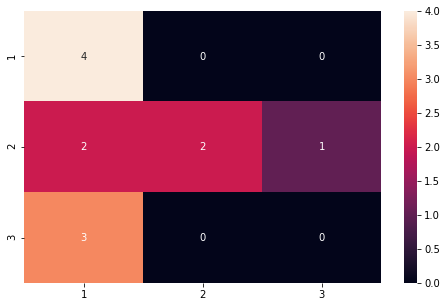

In [ ]:
#MEMBUAT MODEL BAG OF WORDS
cv = CountVectorizer()
x = cv.fit_transform(data['clear_text']).toarray()
y = data.iloc[:,1].values

print("Isi variabel X :")
print("Dimensi variabel X : (",len(x),",",len(cv.vocabulary_),")")
print(x)
print()
print("Isi variabel Y :")
print("Dimensi variabel Y : (",len(y),", 1)")
print(y)
print()
print()


#MEMBAGI DATASET KE DALAM TRAINING DAN TEST SET
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state = 1)

print("isi data latih : ",len(X_train))
print("Data Latih")
print("-------------------------------")
print("Isi variabel X :")
print(X_train)
print()
print("Isi variabel Y :")
print(y_train)
print()
print("isi data uji : ",len(X_test))
print("Data Uji")
print("-------------------------------")
print("Isi variabel X :")
print(X_test)
print()
print("Isi variabel Y :")
print(y_test)
print()


# Metode Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

print("Isi variabel y_test : \n",y_test)
print()
print("Isi variabel y_pred : \n",y_pred)
print()
print("persentase akurasi : ",accuracy_score(y_test, y_pred)*100,"%")
print("persentase precision : ",precision_score(y_test, y_pred,average="macro")*100,"%")
print("persentase recall : ",recall_score(y_test, y_pred,average="macro")*100,"%")
print()

cm = confusion_matrix(y_test, y_pred)
#print(cm)

angka=0
class_names=[]
for i in range(6):
  if i in y_test:
    class_names.append(i)

print("Confusion Matrix")
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
tick_marks = np.arange(len(class_names))+0.5
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()